# Data Cleaning Process

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Handling Missing Values

#### Exploring incomplete features

In [3]:
def null_heatmap(df, cmap='Greens_r'):
    return sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap=cmap)

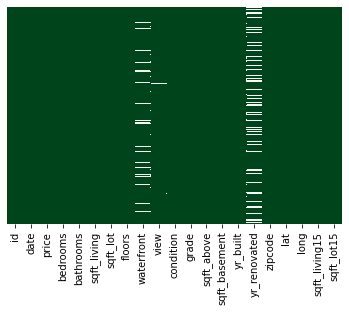

In [4]:
null_heatmap(df);

In [5]:
def percent_nan(df):
    """Return a Series of percent NaN values in each column of a DataFrame"""
    nulls = df.isnull().sum()
    length = len(df.index)
    return nulls / length if length != 0 else None


def display_percent_nan(df):
    """Display formatted percent-NaN-values for each column of a DataFrame"""
    series = percent_nan(df)
    for column in series.index:
        print(f"{column} : {100 * series.at[column]:.2f} % null")
        
def get_value_counts(df):
    """Display value counts values in each column of a DataFrame"""
    for col in df.columns:
        print(col, ':')
        print(df[col].value_counts(dropna=False))   
        
def mode_fill(df, column=None):
    if column:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [6]:
display_percent_nan(df)

id : 0.00 % null
date : 0.00 % null
price : 0.00 % null
bedrooms : 0.00 % null
bathrooms : 0.00 % null
sqft_living : 0.00 % null
sqft_lot : 0.00 % null
floors : 0.00 % null
waterfront : 11.00 % null
view : 0.29 % null
condition : 0.00 % null
grade : 0.00 % null
sqft_above : 0.00 % null
sqft_basement : 0.00 % null
yr_built : 0.00 % null
yr_renovated : 17.79 % null
zipcode : 0.00 % null
lat : 0.00 % null
long : 0.00 % null
sqft_living15 : 0.00 % null
sqft_lot15 : 0.00 % null


In [7]:
# Make copy of the dataframe and drop id column
final_df = df.copy()
final_df.drop('id', axis=1, inplace=True)

In [8]:
# Convert dates to datetime
final_df['date'] = pd.to_datetime(final_df['date'])

In [9]:
# 'waterfront' feature

# Replace NaN's in 'waterfront' and 'view' columns with the mode. 
mode_fill(final_df, 'waterfront')
mode_fill(final_df, 'view')

In [10]:
display_percent_nan(final_df)

date : 0.00 % null
price : 0.00 % null
bedrooms : 0.00 % null
bathrooms : 0.00 % null
sqft_living : 0.00 % null
sqft_lot : 0.00 % null
floors : 0.00 % null
waterfront : 0.00 % null
view : 0.00 % null
condition : 0.00 % null
grade : 0.00 % null
sqft_above : 0.00 % null
sqft_basement : 0.00 % null
yr_built : 0.00 % null
yr_renovated : 17.79 % null
zipcode : 0.00 % null
lat : 0.00 % null
long : 0.00 % null
sqft_living15 : 0.00 % null
sqft_lot15 : 0.00 % null


In [11]:
# Check 'yr_renovated' column
final_df['yr_renovated'].value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

In [12]:
# Mode fill 'yr_renovated' column since the vast majority of values are 0
mode_fill(final_df, 'yr_renovated')

In [13]:
display_percent_nan(final_df)

date : 0.00 % null
price : 0.00 % null
bedrooms : 0.00 % null
bathrooms : 0.00 % null
sqft_living : 0.00 % null
sqft_lot : 0.00 % null
floors : 0.00 % null
waterfront : 0.00 % null
view : 0.00 % null
condition : 0.00 % null
grade : 0.00 % null
sqft_above : 0.00 % null
sqft_basement : 0.00 % null
yr_built : 0.00 % null
yr_renovated : 0.00 % null
zipcode : 0.00 % null
lat : 0.00 % null
long : 0.00 % null
sqft_living15 : 0.00 % null
sqft_lot15 : 0.00 % null


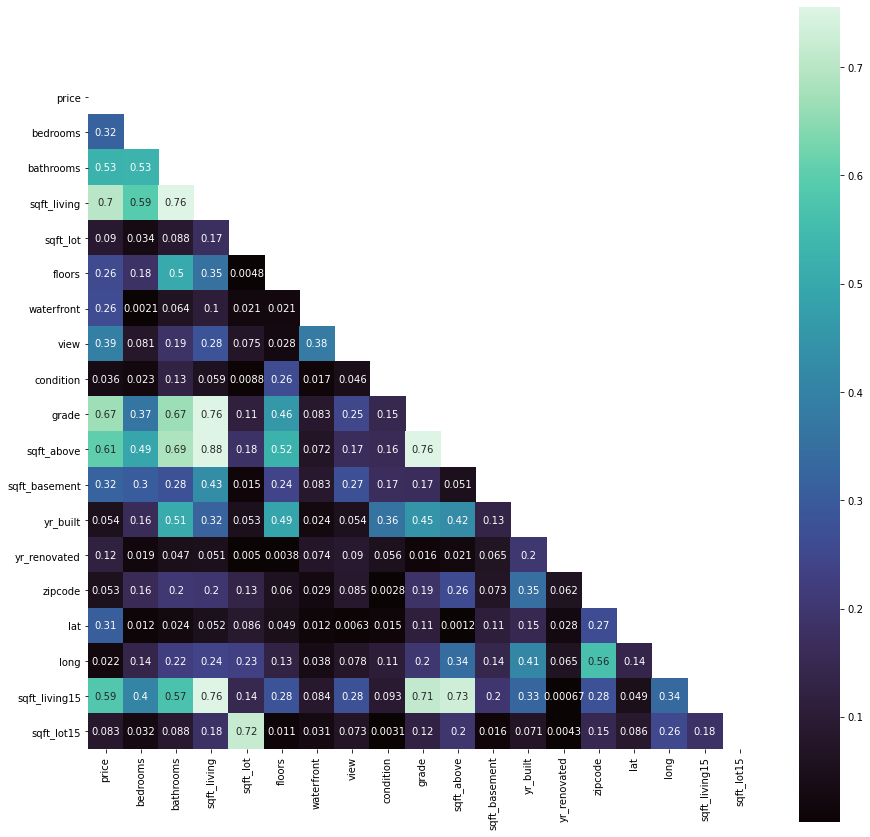

In [52]:
# Multicollinearity
def corr_heatmap(df):
    X = df.drop('price', axis=1)
    y = df['price']

    corr = X.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize=(15, 15))
    
    return sns.heatmap(np.abs(corr), mask=mask, square=True, annot=True, ax=ax, robust=True, cmap='mako');
    
    
    
X = final_df.drop('price', axis=1)
y = final_df['price']

corr = final_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(np.abs(corr), mask=mask, square=True, annot=True, ax=ax, robust=True, cmap='mako');

In [17]:
# Replace '?' from 'sqft_basement' feature with '0.0', then coerce to float
final_df['sqft_basement'] = final_df['sqft_basement'].str.replace('?', '0.0').astype(float)

In [18]:
final_df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  float64       
 8   view           21597 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipcode        2159

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

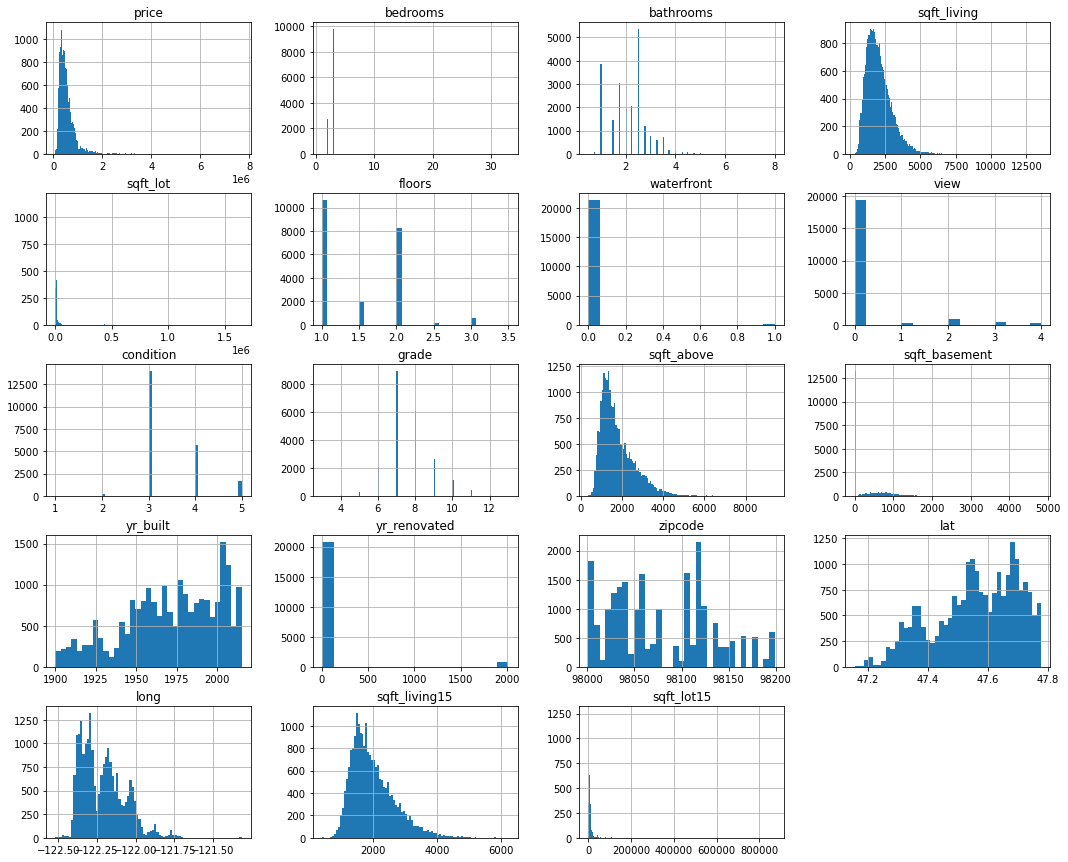

In [37]:

final_df.hist(bins='auto', figsize=(18, 15))

In [45]:
final_df.corrwith(final_df['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.701929
grade            0.667964
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
view             0.393502
sqft_basement    0.321103
bedrooms         0.315961
lat              0.306687
waterfront       0.264308
floors           0.256820
yr_renovated     0.117858
sqft_lot         0.089879
sqft_lot15       0.082849
yr_built         0.053965
condition        0.036031
long             0.022047
zipcode         -0.053409
dtype: float64